<a href="https://colab.research.google.com/github/zahidshaon/Machine-Learning-Based-ETP-Outlet-Monitoring/blob/main/RGB_color_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

### Read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/RGB.csv')
df2= pd.read_csv('/content/WQI_s.csv')
df



,Red,Green,Blue


Convert frames to RGB

In [ ]:
cap= cv2.VideoCapture('/content/drive/MyDrive/videoetp/etp.mp4')
i = 0
frame_skip = 60
while (cap.isOpened()):
  ret, frame = cap.read()
  if not ret:
    break
    
  if i > frame_skip - 1:
    b = frame[:, :, :1] 
    g = frame[:, :, 1:2] 
    r = frame[:, :, 2:] 
  
    # computing the mean 
    b_mean = np.mean(b) 
    g_mean = np.mean(g) 
    r_mean = np.mean(r)
    df=df.append({'Red': r_mean,'Green': g_mean,'Blue': b_mean},ignore_index=True)
    i = 0
    continue
  
  i += 1
cap.release()
cv2.destroyAllWindows()

In [ ]:
df

,Red,Green,Blue
0,145.885168,141.222541,142.446254
1,146.323083,141.264084,143.015569
2,145.572303,141.132422,142.245067
3,142.443296,138.039222,139.143286
4,146.499362,141.794685,142.769372
...,...,...,...
4543,130.387509,137.921986,147.160493
4544,128.943725,136.732111,146.096746
4545,126.361435,134.163081,143.285556
4546,126.447465,133.246493,141.529487


In [ ]:
df2

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


In [ ]:
df2_mean = df2.mean()
df0=df2.replace(np.nan, df2_mean)
df0

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4702,8/20/2020 10:36:00,33.57,7.88,7.0,4.14,284.41,0.77,91.26,Very Good,1,0
4703,8/20/2020 10:38:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4704,8/20/2020 10:40:00,33.57,7.88,7.0,4.14,284.40,0.77,91.26,Very Good,1,0
4705,8/20/2020 10:41:00,33.57,7.88,7.0,4.14,284.39,0.77,91.26,Very Good,1,0


In [ ]:
print(df.dtypes)
print(df0.dtypes)

Red      float64
Green    float64
Blue     float64
dtype: object
Date             object
Temperature     float64
pH              float64
DO              float64
Turbidity(V)    float64
TDS             float64
EC              float64
WQI             float64
WQC              object
Numeric_WQC       int64
Verdict           int64
dtype: object


In [ ]:
df1 = pd.DataFrame() 
df1=pd.merge(df0, df, left_index=True, right_index=True)
df1

,Date,Temperature,pH,DO,Turbidity(V),TDS,EC,WQI,WQC,Numeric_WQC,Verdict,Red,Green,Blue
0,8/15/2020 0:00:00,33.44,7.55,7.0,4.14,289.00,0.78,91.19,Very Good,1,0,145.885168,141.222541,142.446254
1,8/15/2020 0:01:00,33.44,7.94,7.0,4.14,291.00,0.79,91.19,Very Good,1,0,146.323083,141.264084,143.015569
2,8/15/2020 0:03:00,33.44,7.88,7.0,4.14,291.00,0.79,91.19,Very Good,1,0,145.572303,141.132422,142.245067
3,8/15/2020 0:05:00,33.44,7.82,7.0,4.14,291.00,0.79,91.19,Very Good,1,0,142.443296,138.039222,139.143286
4,8/15/2020 0:06:00,33.44,8.01,7.0,4.14,289.00,0.78,91.19,Very Good,1,0,146.499362,141.794685,142.769372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,8/20/2020 6:11:00,33.55,7.88,7.0,4.14,285.15,0.77,91.25,Very Good,1,0,130.387509,137.921986,147.160493
4544,8/20/2020 6:13:00,33.55,7.88,7.0,4.14,285.15,0.77,91.25,Very Good,1,0,128.943725,136.732111,146.096746
4545,8/20/2020 6:15:00,33.55,7.88,7.0,4.14,285.14,0.77,91.25,Very Good,1,0,126.361435,134.163081,143.285556
4546,8/20/2020 6:16:00,33.55,7.88,7.0,4.14,285.14,0.77,91.25,Very Good,1,0,126.447465,133.246493,141.529487


Plotting

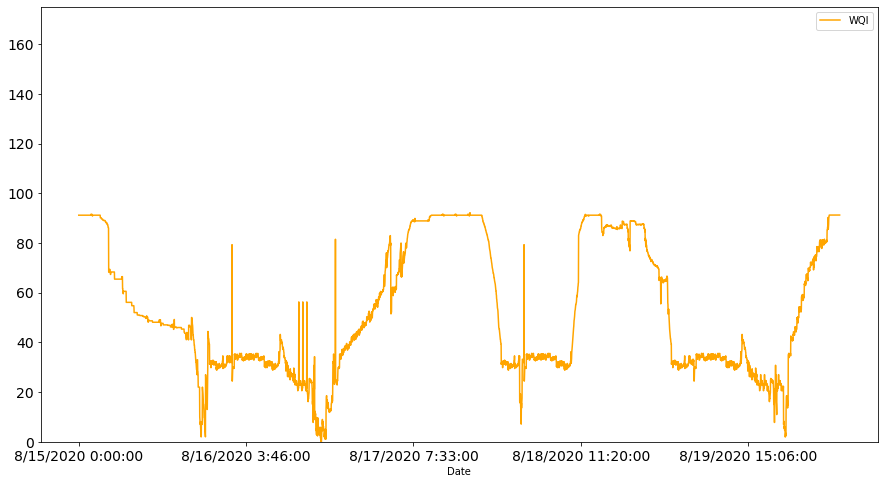

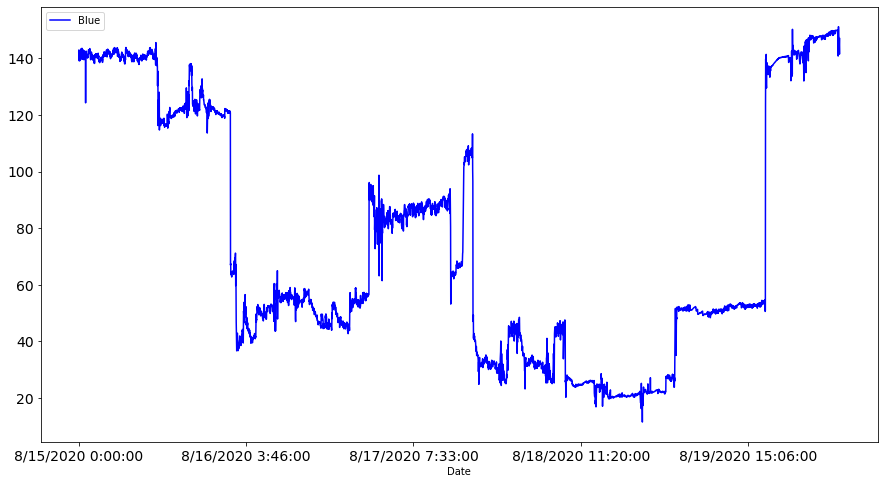

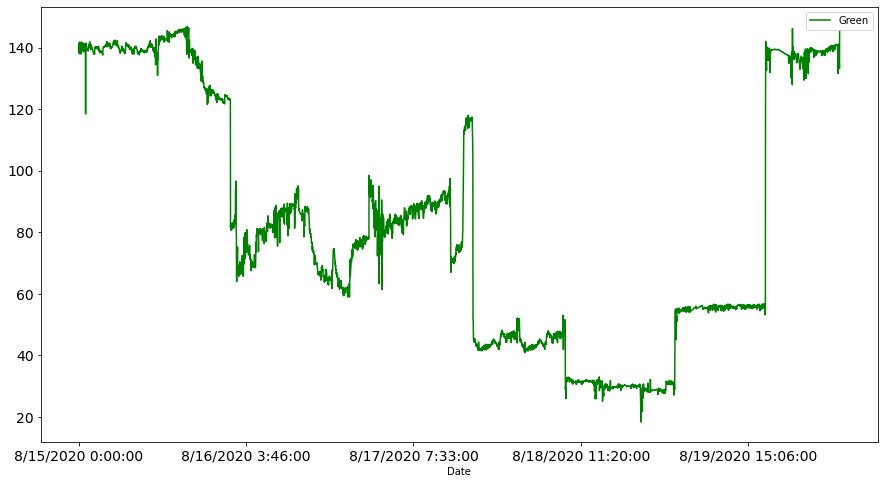

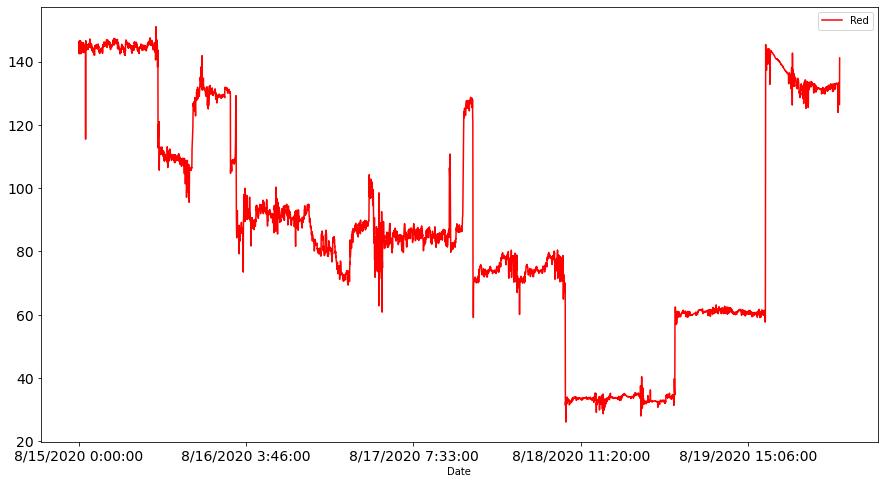

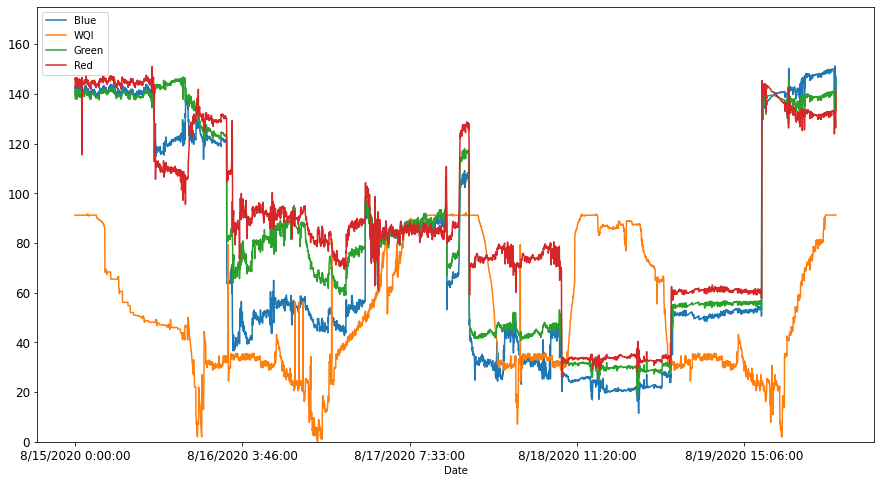

In [ ]:
df1.plot(0,7, kind = 'line', ylim=(0,175), figsize=(15,8), color='orange', fontsize=14)
df1.plot(0,-1, kind = 'line', color='Blue', figsize=(15,8), fontsize=16)
df1.plot(0,-2, kind = 'line', color='green', figsize=(15,8), fontsize=16)
df1.plot(0,-3, kind = 'line', color='red', figsize=(15,8), fontsize=16)
df1.plot(0, [-1,7,-2,-3], kind = 'line', figsize=(15,8), fontsize=16)
ax = plt.gca()
ax.set_ylim([0,175])
plt.show()